In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

# LAMMPS: fix/wall

## Intro

Slacks post: Friday 29th April 2022.

Checking wall-particle interactions for potentials available under fix/wall-region, LAMMPS. 

url: https://docs.lammps.org/fix_wall_region.html


For water, the LJ potential paramters are $σ = 2.725 \left( Å \right)$ and $\epsilon = 4.9115 \left( \times 10^{-21} J \right)$. 

url: https://link.springer.com/article/10.1007/s00707-004-0134-x 

$r$ is the distance between two interacting particles, 

$\epsilon$ is the depth of the potential well (usually referred to as 'dispersion energy'), and 

$\sigma$ is the distance at which the particle-particle potential energy $E$ is zero (often referred to as 'size of the particle'). 

url: https://en.wikipedia.org/wiki/Lennard-Jones_potential 

##LJ9-3

For style lj93, the energy $E$ is given by the 9/3 potential: 

$E = \epsilon \left[ \frac{2}{15} \left(\frac{\sigma}{r} \right)^9 - \left(\frac{\sigma}{r} \right)^3 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 9\times\frac{2}{15} \left(\frac{\sigma}{r} \right)^{10} - 3\times\left(\frac{\sigma}{r} \right)^4 \right] \quad \implies \quad 9\times\frac{2}{15} \left(\frac{\sigma}{r} \right)^{10} = 3\times\left(\frac{\sigma}{r} \right)^4 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{3\times15}{2\times9}$

$r_{min} = \frac{5}{2}^{\left(\frac{1}{6}\right)}σ$

### Single plot

(-10.0, 10.0)

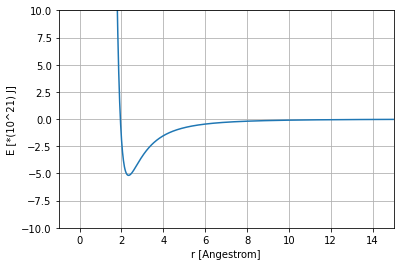

In [2]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
r_min = ((5/2)**(1/6))*sig
distance = np.linspace(0.01, 15, 1000, False)
LJ93 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ93[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, LJ93)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([-1, 15])
plt.ylim([-10, 10])

### Parameter effect 

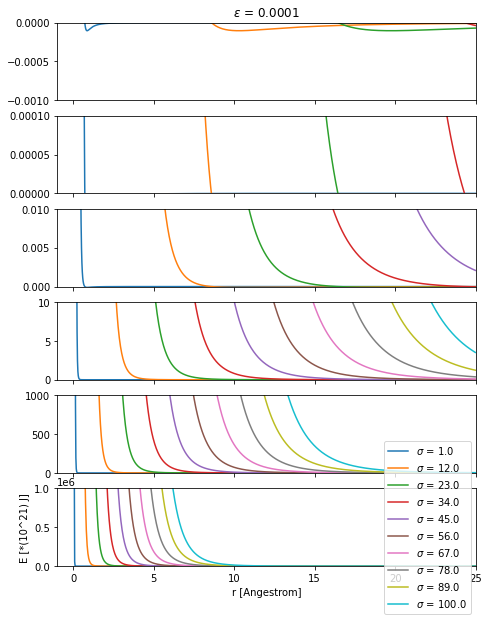

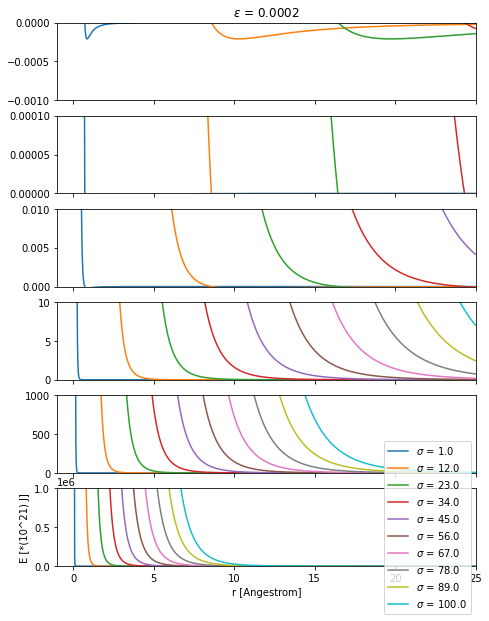

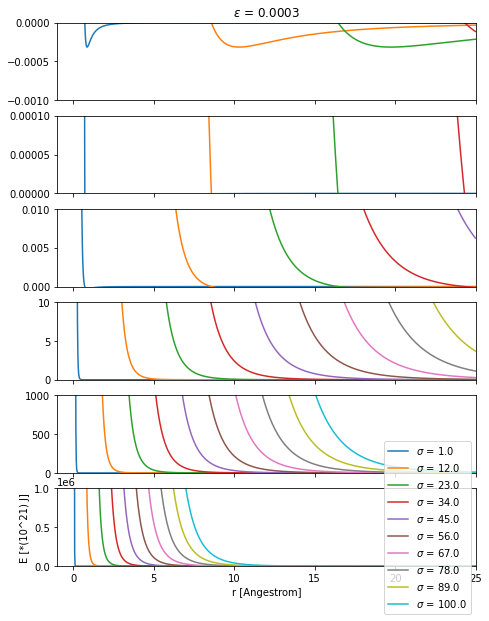

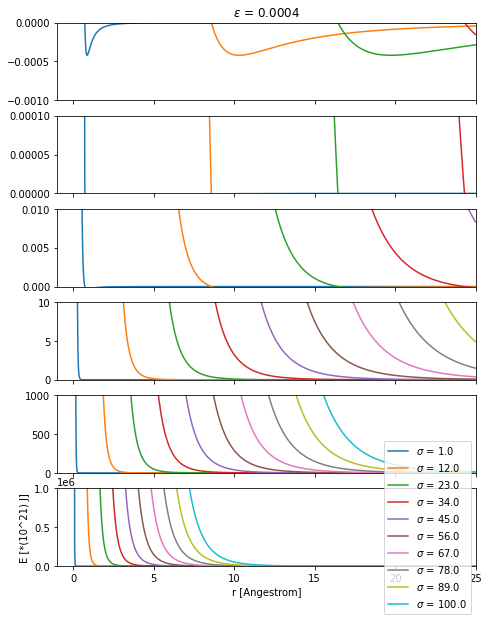

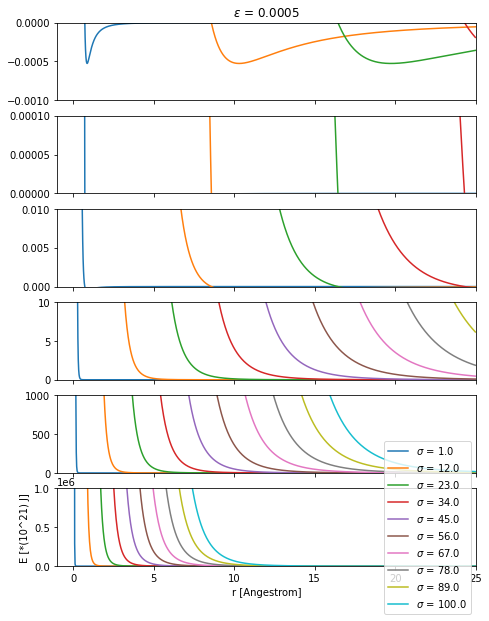

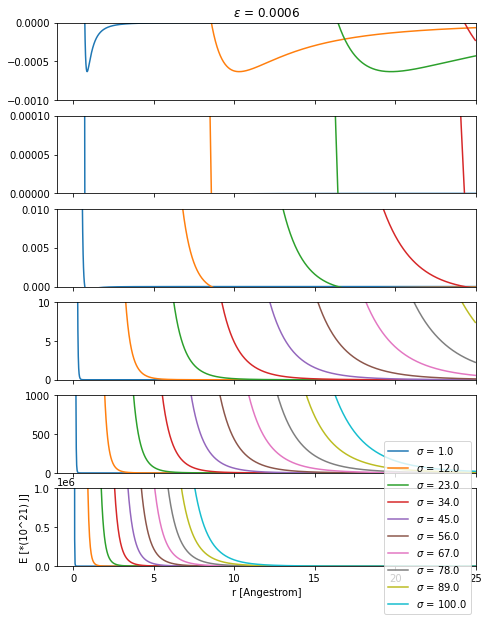

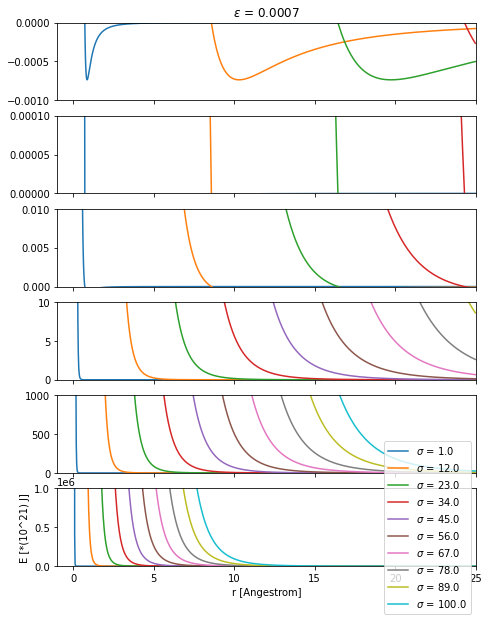

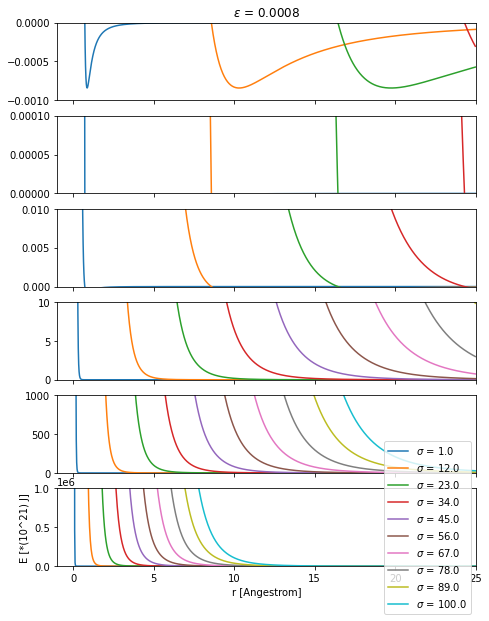

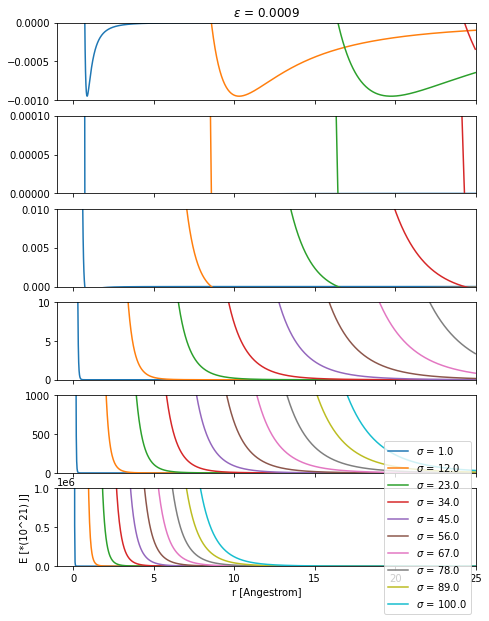

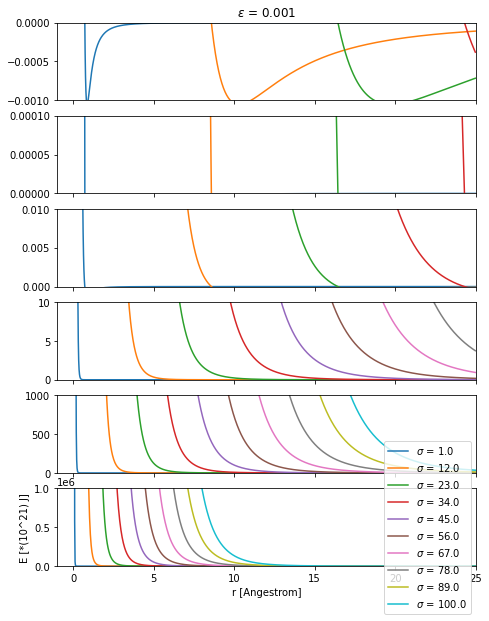

In [3]:
from IPython.core.pylabtools import figsize
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom

EPS = np.linspace(1e-4, 1e-3, 10)
SIG = np.linspace(1, 100, 10)

for eps in EPS:
  fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(7.5, 10))
  for sig in SIG: 
    #r_min = ((5/2)**(1/6))*sig
    distance = np.linspace(0.01, 25, 1000, False)
    LJ93 = np.zeros(len(distance))
    index = 0
    for r in distance:
      LJ93[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3))
      index = index + 1
    #plt.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig:.2}')
    ax1.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
    ax1.set_ylim((-1e-3, 0))
    ax1.set_xlim((-1,25))
    ax2.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
    ax2.set_ylim((0, 1e-4))
    ax2.set_xlim((-1,25))
    ax3.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
    ax3.set_ylim((0, 1e-2))
    ax3.set_xlim((-1,25))
    ax4.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
    ax4.set_ylim((0, 1e1))
    ax4.set_xlim((-1,25))
    ax5.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
    ax5.set_ylim((0, 1e3))
    ax5.set_xlim((-1,25))
    ax6.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
    ax6.set_ylim((0, 1e6))
    ax6.set_xlim((-1,25))
    plt.xlabel('r [Angestrom]')
    plt.ylabel('E [*(10^21) J]')
  #plt.legend(loc='right')
  #ax1.legend(loc='right')
  #ax2.legend(loc='right')
  ax6.legend(loc='right')
  #ax4.legend(loc='right')
  ax1.set_title('$\epsilon$ = 'f'{eps:.3}')
  plt.show()

##LJ12-6

For style lj126, the energy $E$ is given by the 12/6 potential:

$E = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 12\times\left(\frac{\sigma}{r} \right)^{13} - 6\times\left(\frac{\sigma}{r} \right)^7 \right]  \quad \implies \quad 12\left(\frac{\sigma}{r} \right)^{13} = 6\times\left(\frac{\sigma}{r} \right)^7 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{6}{12}$

$r_{min} = 2^{\frac{1}{6}}σ$

### Single plot

(-10.0, 10.0)

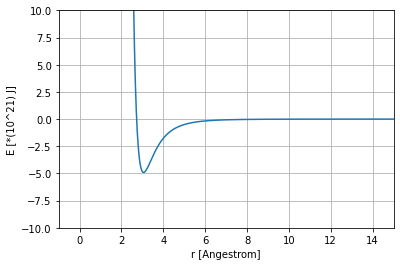

In [4]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
r_min = (2**(1/6)) * sig 
distance = np.linspace(0.01, 15, 1000, False)
LJ126 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ126[index] = 4*eps*(((sig/r)**12)-((sig/r)**6))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, LJ126)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([-1, 15])
plt.ylim([-10, 10])

### Paramter effect

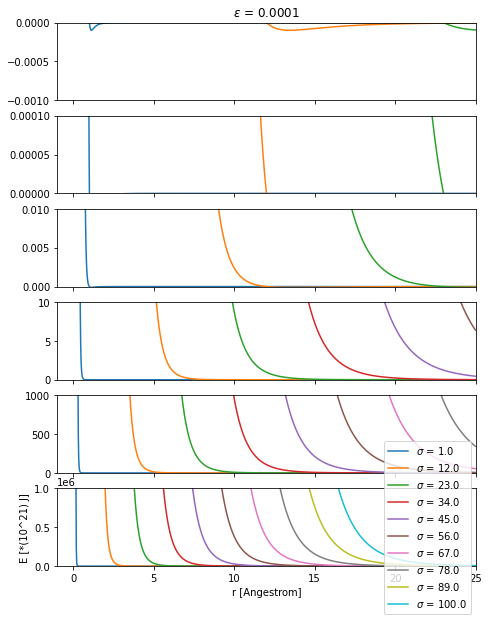

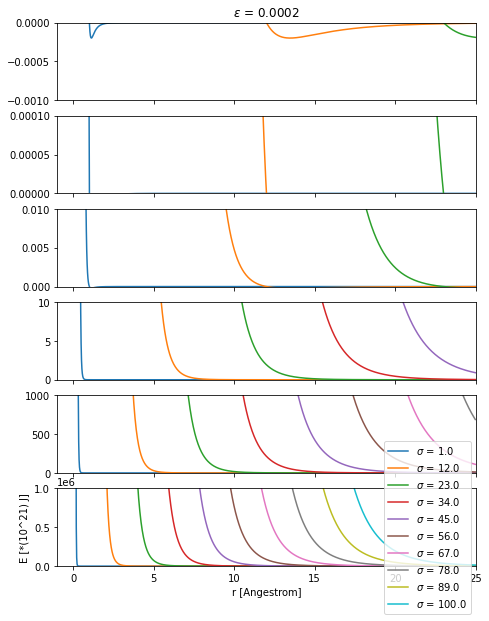

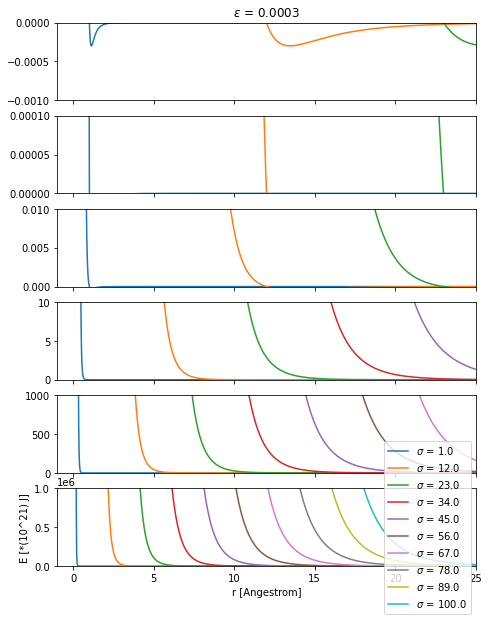

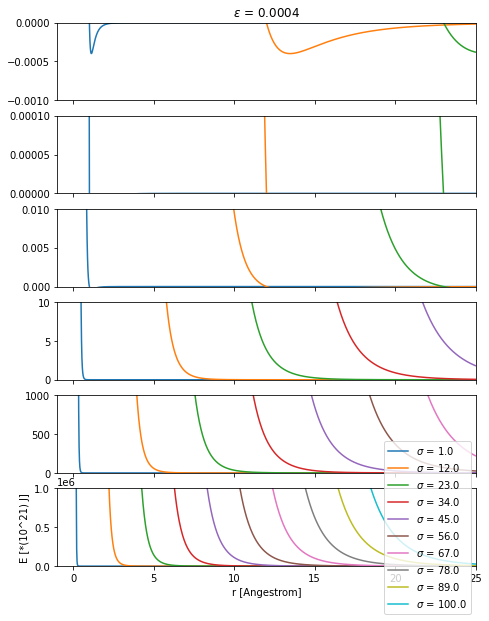

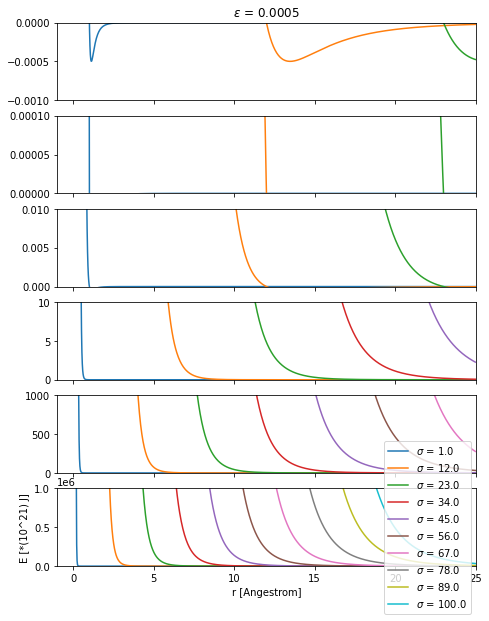

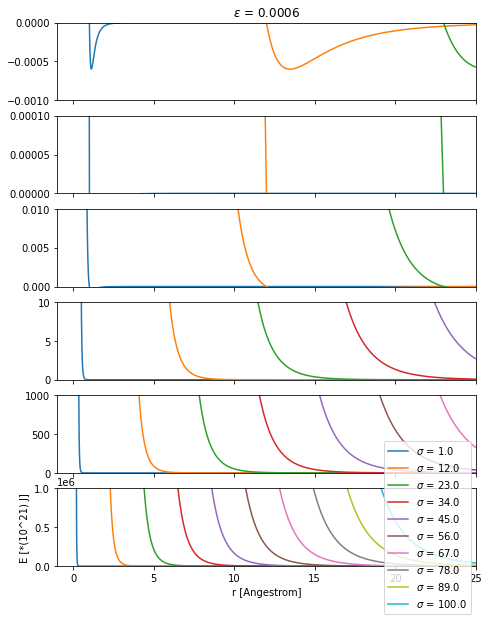

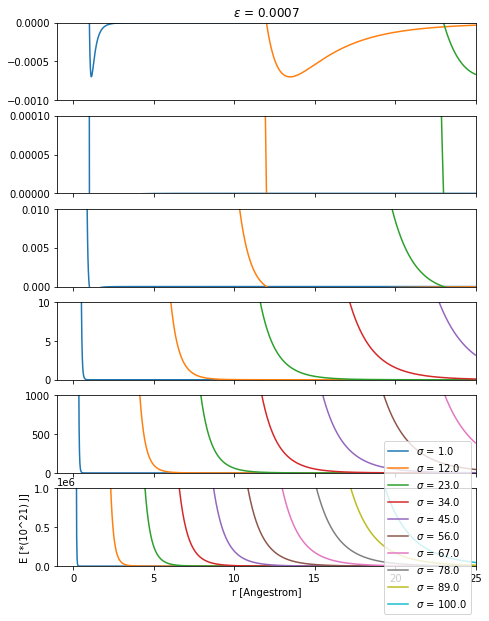

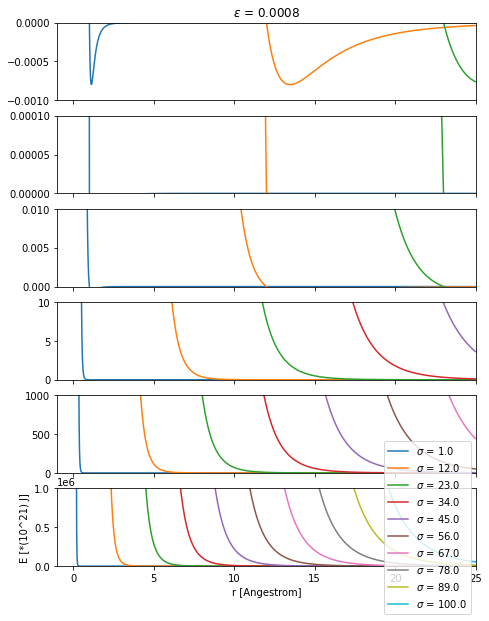

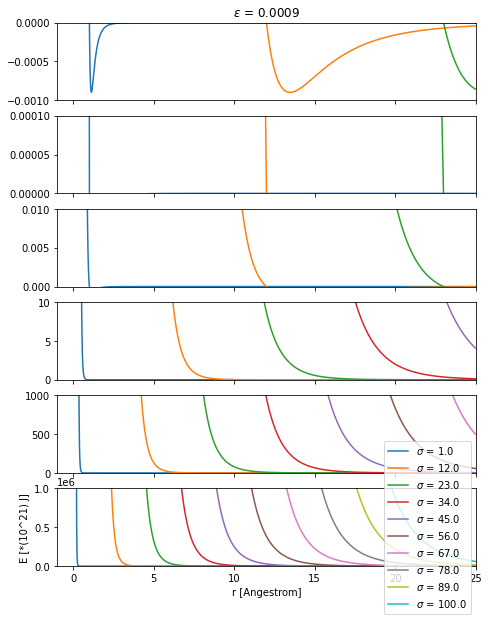

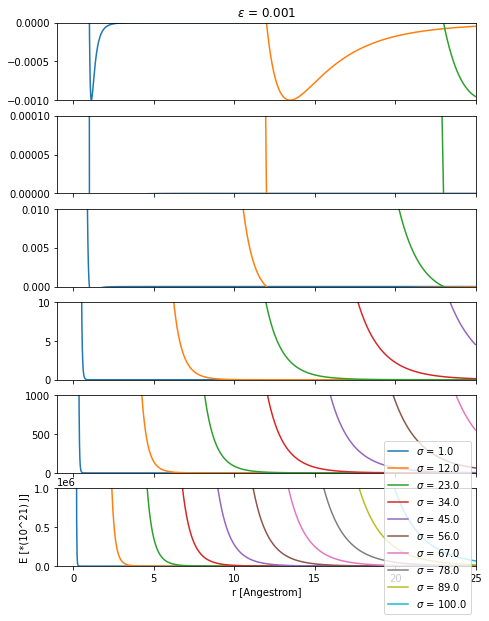

In [5]:
from IPython.core.pylabtools import figsize
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom

EPS = np.linspace(1e-4, 1e-3, 10)
SIG = np.linspace(1, 100, 10)

for eps in EPS:
  fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(7.5, 10))
  for sig in SIG: 
    #r_min = ((5/2)**(1/6))*sig
    distance = np.linspace(0.01, 25, 1000, False)
    LJ126 = np.zeros(len(distance))
    index = 0
    for r in distance:
      LJ126[index] = 4*eps*(((sig/r)**12)-((sig/r)**6))
      index = index + 1
    #plt.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig:.2}')
    ax1.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
    ax1.set_ylim((-1e-3, 0))
    ax1.set_xlim((-1,25))
    ax2.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
    ax2.set_ylim((0, 1e-4))
    ax2.set_xlim((-1,25))
    ax3.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
    ax3.set_ylim((0, 1e-2))
    ax3.set_xlim((-1,25))
    ax4.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
    ax4.set_ylim((0, 1e1))
    ax4.set_xlim((-11,25))
    ax5.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
    ax5.set_ylim((0, 1e3))
    ax5.set_xlim((-1,25))
    ax6.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
    ax6.set_ylim((0, 1e6))
    ax6.set_xlim((-1,25))
    plt.xlabel('r [Angestrom]')
    plt.ylabel('E [*(10^21) J]')
  #plt.legend(loc='right')
  #ax1.legend(loc='right')
  #ax2.legend(loc='right')
  ax6.legend(loc='right')
  #ax4.legend(loc='right')
  ax1.set_title('$\epsilon$ = 'f'{eps:.3}')
  plt.show()

##LJ10-4-3

For style wall/lj1043, the energy $E$ is given by the 10/4/3 potential:

$E = 2π\epsilon \left[\frac{2}{5} \left(\frac{\sigma}{r} \right)^{10} - \left(\frac{\sigma}{r} \right)^4 - \frac{\sqrt{2}σ^3}{3\left( r + \left( \frac{0.61}{\sqrt{2}}\right)\sigma\right)^3}\right]          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[10\times\frac{2}{5} \left(\frac{\sigma}{r} \right)^{11} - 4×\left(\frac{\sigma}{r} \right)^5 + 3\times\frac{\sqrt{2}σ^3}{3\left( r + \left( \frac{0.61}{\sqrt{2}}\right)\sigma\right)^4}\right]$

$r_{min} = 2.73946825$, see plot bellow 

Text(0, 0.5, 'dE/dr')

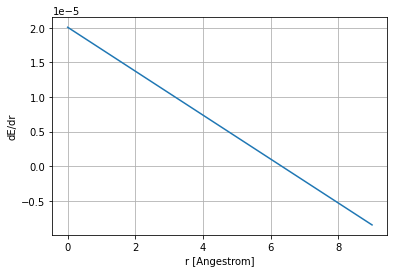

In [6]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
dE = []
R = np.linspace(2739.4665, 2739.470, 10)
for rr in R: 
  r = rr / 1000
  dummy = 10*(2/5)*((sig/r)**11) - 4*((sig/r)**5) + 3*(math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**4))
  dE.append(dummy)
#plt.figure(figsize=(10,7.5))
plt.plot(dE)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('dE/dr')

### Single plot

(-10.0, 10.0)

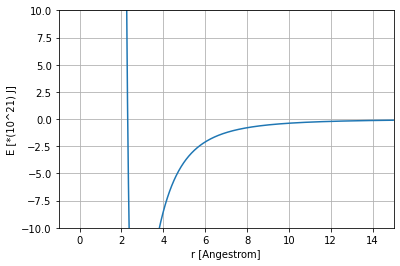

In [7]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
r_min = 2.73946825
distance = np.linspace(0.01, 15, 1000, False)
LJ1043 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ1043[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3))))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, LJ1043)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([-1, 15])
plt.ylim([-10, 10])

### Parameter effect

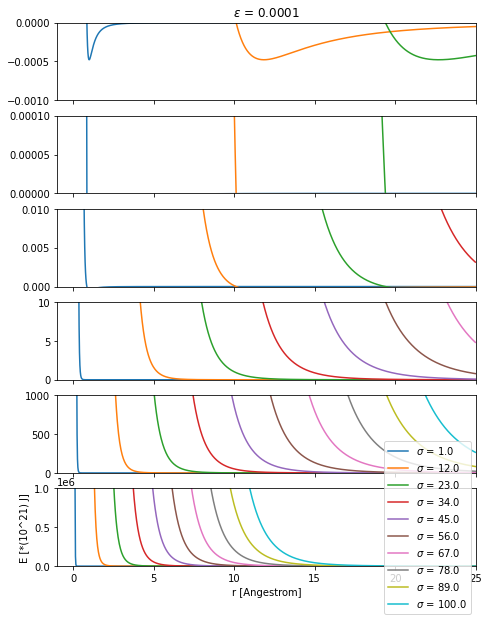

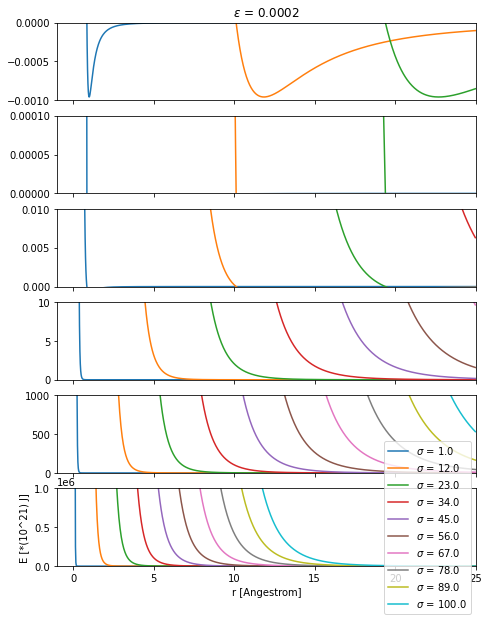

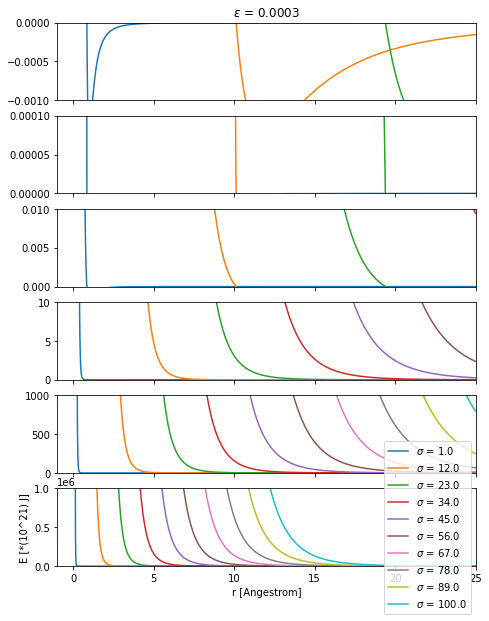

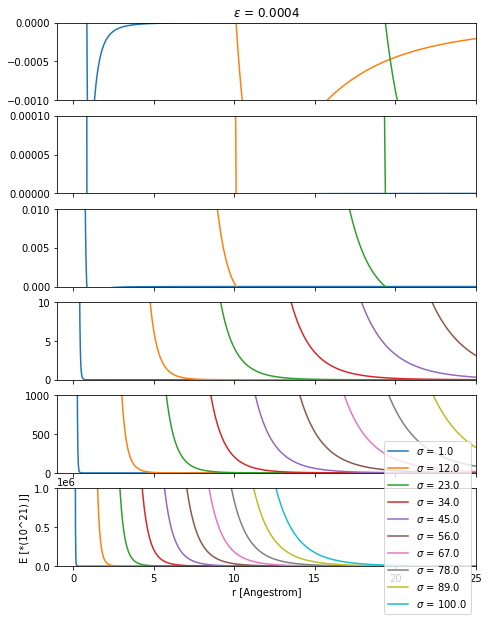

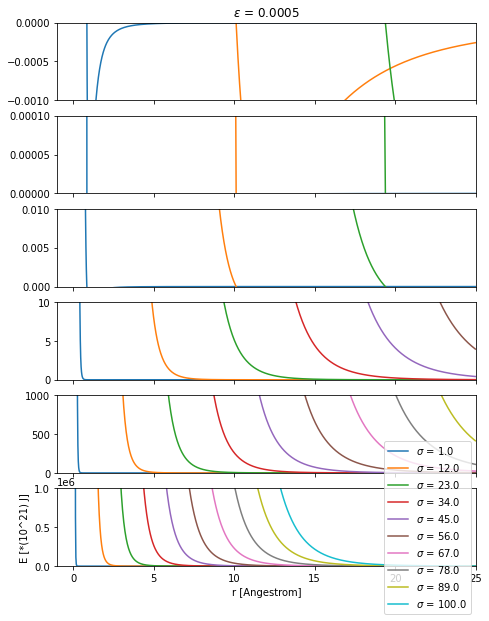

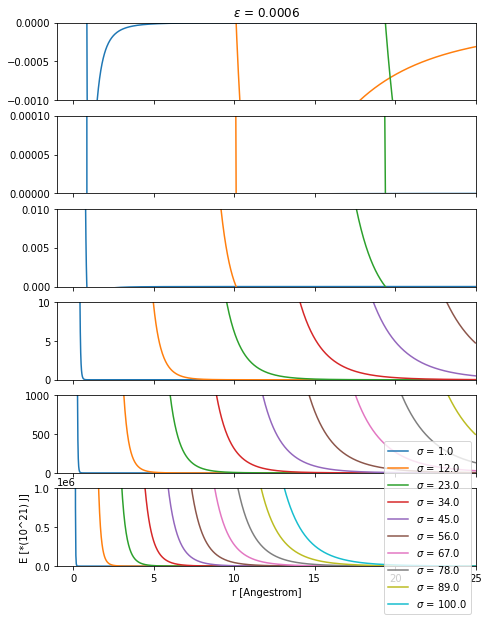

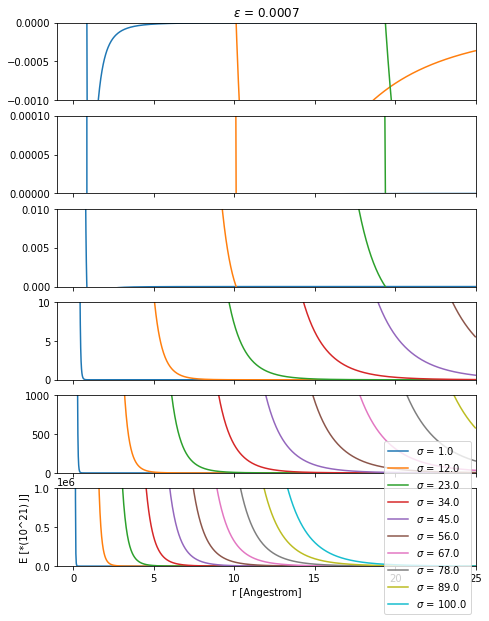

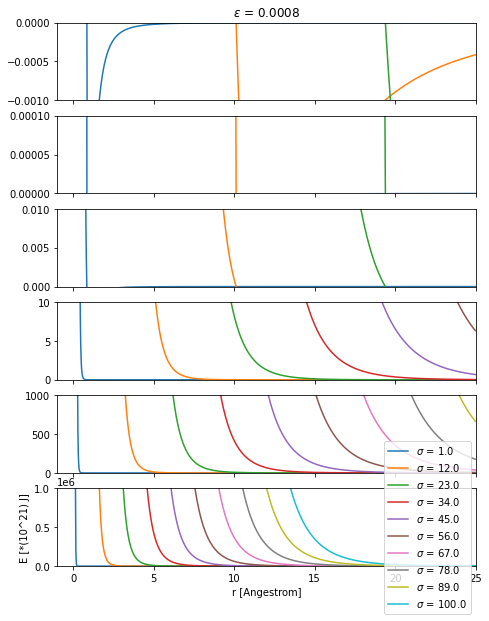

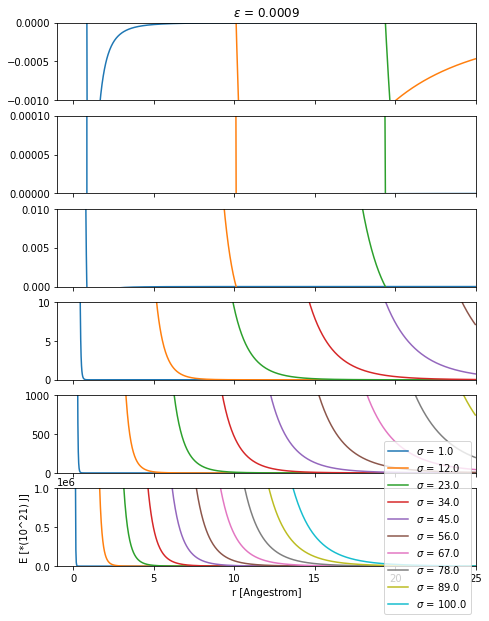

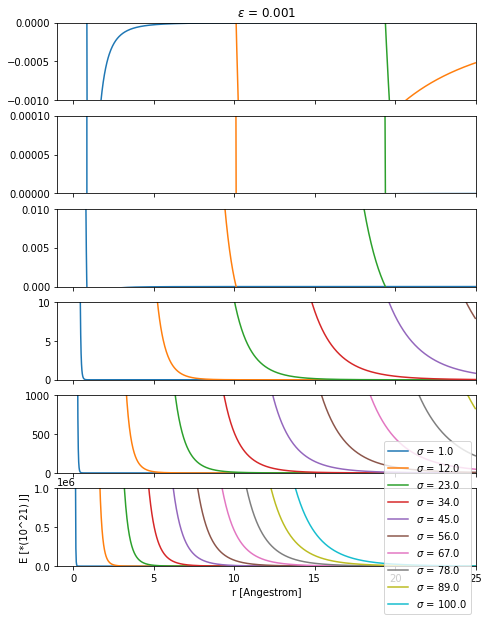

In [8]:
from IPython.core.pylabtools import figsize
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom

EPS = np.linspace(1e-4, 1e-3, 10)
SIG = np.linspace(1, 100, 10)

for eps in EPS:
  fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(7.5, 10))
  for sig in SIG: 
    #r_min = ((5/2)**(1/6))*sig
    distance = np.linspace(0.01, 25, 1000, False)
    LJ1043 = np.zeros(len(distance))
    index = 0
    for r in distance:
      LJ1043[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3))))
      index = index + 1
    #plt.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig:.2}')
    ax1.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
    ax1.set_ylim((-1e-3, 0))
    ax1.set_xlim((-1,25))
    ax2.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
    ax2.set_ylim((0, 1e-4))
    ax2.set_xlim((-1,25))
    ax3.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
    ax3.set_ylim((0, 1e-2))
    ax3.set_xlim((-1,25))
    ax4.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
    ax4.set_ylim((0, 1e1))
    ax4.set_xlim((-1,25))
    ax5.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
    ax5.set_ylim((0, 1e3))
    ax5.set_xlim((-1,25))
    ax6.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
    ax6.set_ylim((0, 1e6))
    ax6.set_xlim((-1,25))
    plt.xlabel('r [Angestrom]')
    plt.ylabel('E [*(10^21) J]')
  #plt.legend(loc='right')
  #ax1.legend(loc='right')
  #ax2.legend(loc='right')
  ax6.legend(loc='right')
  #ax4.legend(loc='right')
  ax1.set_title('$\epsilon$ = 'f'{eps:.3}')
  plt.show()

##Harmonic

For style wall/harmonic, the energy $E$ is given by a harmonic spring potential (the distance parameter is ignored):

$E = ϵ \left( r - r_c \right)^2          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 2\times\left( r - r_c \right) = 0 \quad \implies \quad r_{min} = r_c \quad \cdot\cdot\cdot\cdot \quad$ ***arbitrary***

### Single plot

(-10.0, 10.0)

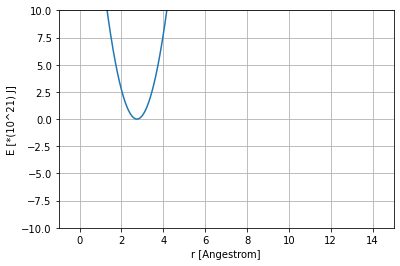

In [9]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
r_min = 2.73946825
rc = r_min
distance = np.linspace(0.01, 15, 1000, False)
harm = np.zeros(len(distance))
index = 0
for r in distance:
  harm[index] = eps*((r - rc)**2)
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, harm)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([-1, 15])
plt.ylim([-10, 10])

### Paramter effect

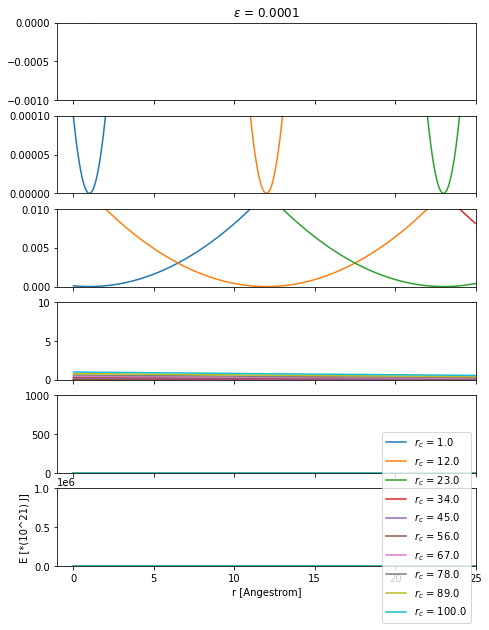

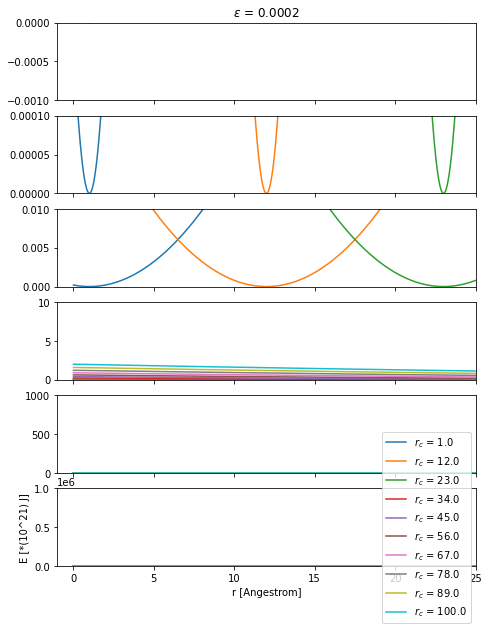

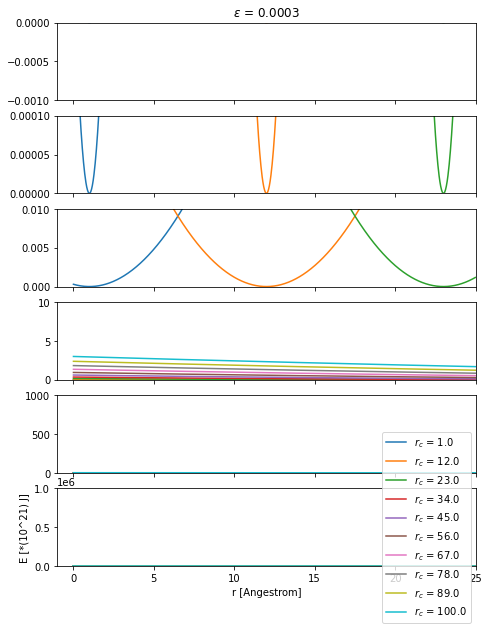

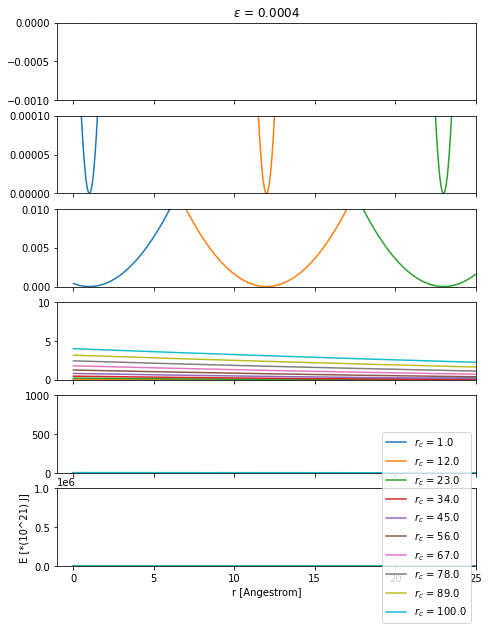

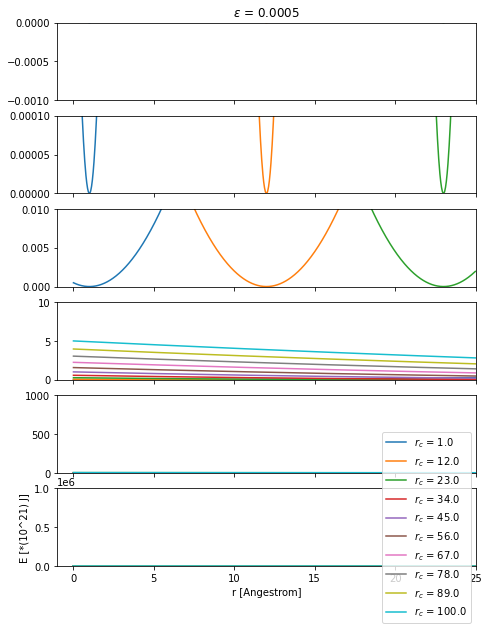

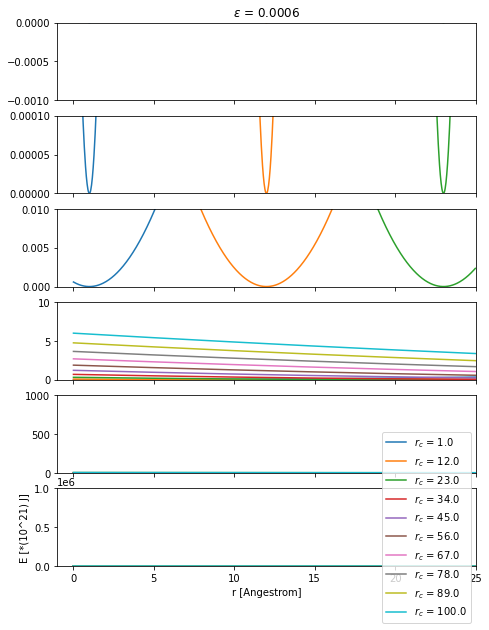

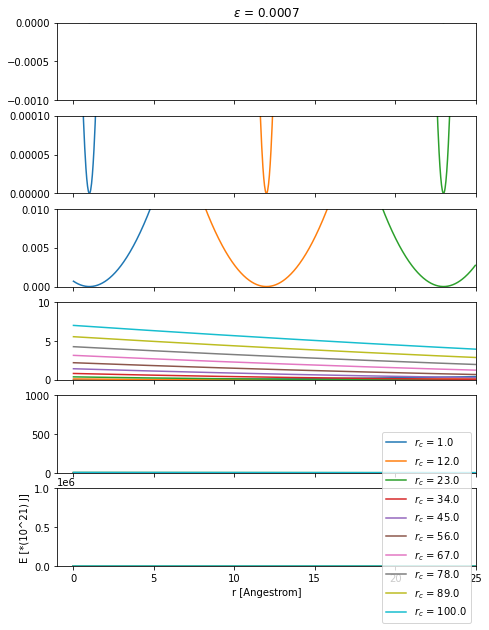

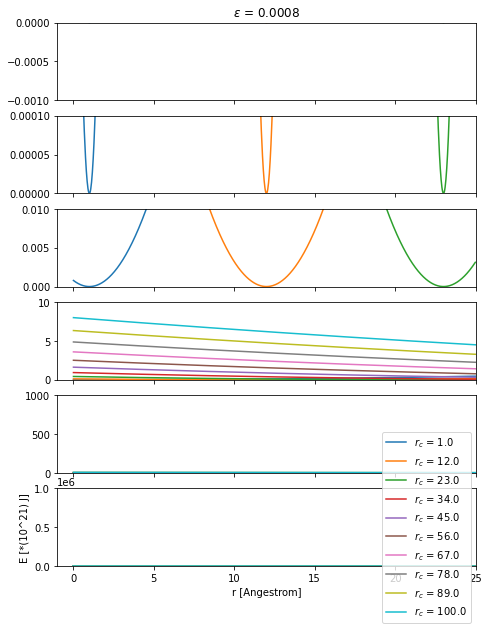

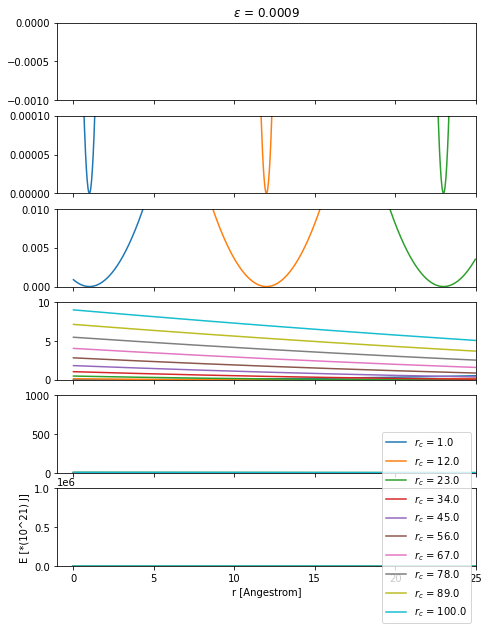

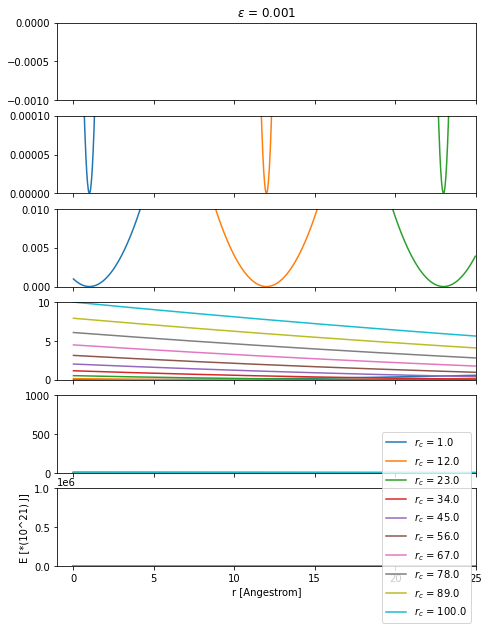

In [10]:
from IPython.core.pylabtools import figsize
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom

EPS = np.linspace(1e-4, 1e-3, 10)
SIG = np.linspace(1, 100, 10)

for eps in EPS:
  fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(7.5, 10))
  for sig in SIG: 
    rc=sig
    #r_min = ((5/2)**(1/6))*sig
    distance = np.linspace(0.01, 25, 1000, False)
    harm = np.zeros(len(distance))
    index = 0
    for r in distance:
      harm[index] = eps*((r - rc)**2)
      index = index + 1
    #plt.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig:.2}')
    ax1.plot(distance, harm, label = '$r_c$ = 'f'{sig}')
    ax1.set_ylim((-1e-3, 0))
    ax1.set_xlim((-1,25))
    ax2.plot(distance, harm, label = '$r_c$ = 'f'{sig}')
    ax2.set_ylim((0, 1e-4))
    ax2.set_xlim((-1,25))
    ax3.plot(distance, harm, label = '$r_c$ = 'f'{sig}')
    ax3.set_ylim((0, 1e-2))
    ax3.set_xlim((-1,25))
    ax4.plot(distance, harm, label = '$r_c$ = 'f'{sig}')
    ax4.set_ylim((0, 1e1))
    ax4.set_xlim((-1,25))
    ax5.plot(distance, harm, label = '$r_c$ = 'f'{sig}')
    ax5.set_ylim((0, 1e3))
    ax5.set_xlim((-1,25))
    ax6.plot(distance, harm, label = '$r_c$ = 'f'{sig}')
    ax6.set_ylim((0, 1e6))
    ax6.set_xlim((-1,25))
    plt.xlabel('r [Angestrom]')
    plt.ylabel('E [*(10^21) J]')
  #plt.legend(loc='right')
  #ax1.legend(loc='right')
  #ax2.legend(loc='right')
  ax6.legend(loc='right')
  #ax4.legend(loc='right')
  ax1.set_title('$\epsilon$ = 'f'{eps:.3}')
  plt.show()

##Morse

For style wall/morse, the energy $E$ is given by the Morse potential:

$E = D_0 \left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right]          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad D_0 \left[ {-2α}e^{-2α\left( r - r_0 \right)} +2αe^{-α\left( r - r_0 \right)} \right] = 0 \quad \implies \quad r_{min} = r_0 \quad \cdot\cdot\cdot\cdot \quad$ ***arbitrary***

### Single plot

(-10.0, 10.0)

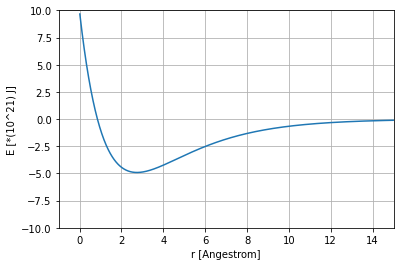

In [11]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
r_min = 2.73946825
r_0 = r_min
distance = np.linspace(0.01, 15, 1000, False)
morse = np.zeros(len(distance))
D_0 = eps #depth of the potential (energy units)
alpha = 1/sig #width parameter (1/distance units)
index = 0
for r in distance:
  morse[index] = D_0*(math.exp(-2*alpha*(r - r_0)) - 2*math.exp(-alpha*(r - r_0)))
  index = index + 1
#plt.figure(figsize=(10,7.5))
plt.plot(distance, morse)
plt.grid()
plt.xlabel('r [Angestrom]')
plt.ylabel('E [*(10^21) J]')
plt.xlim([-1, 15])
plt.ylim([-10, 10])

### Parameter plots 

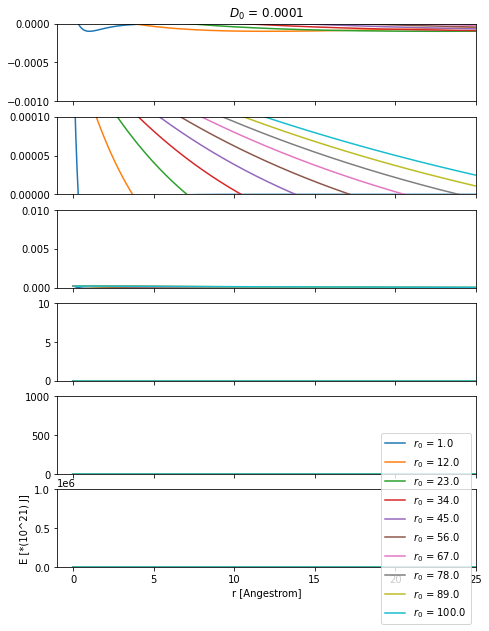

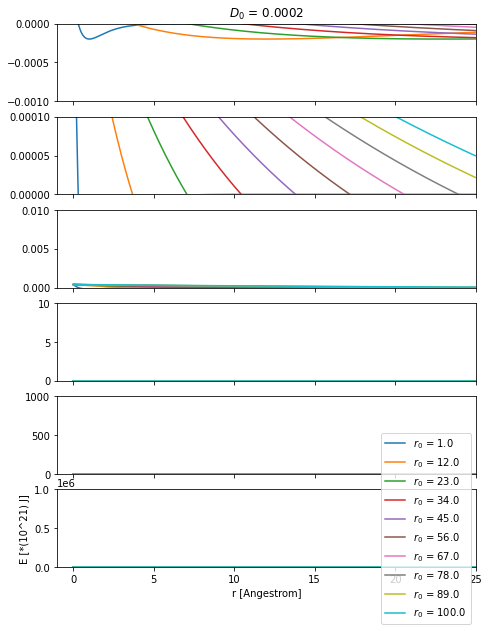

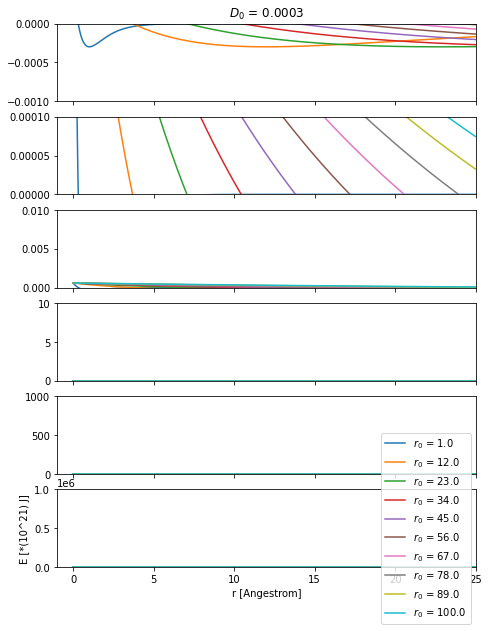

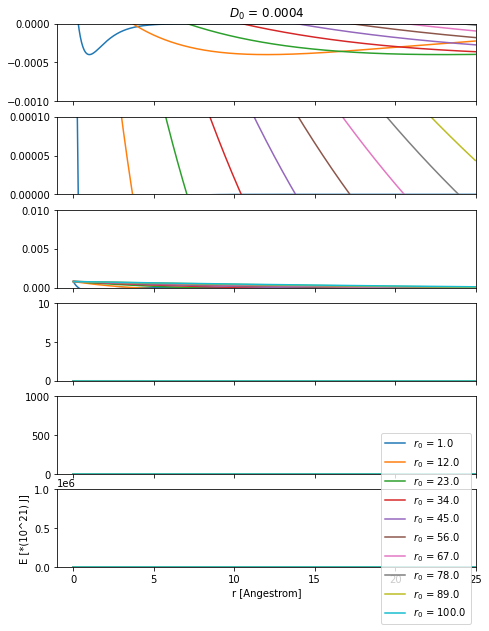

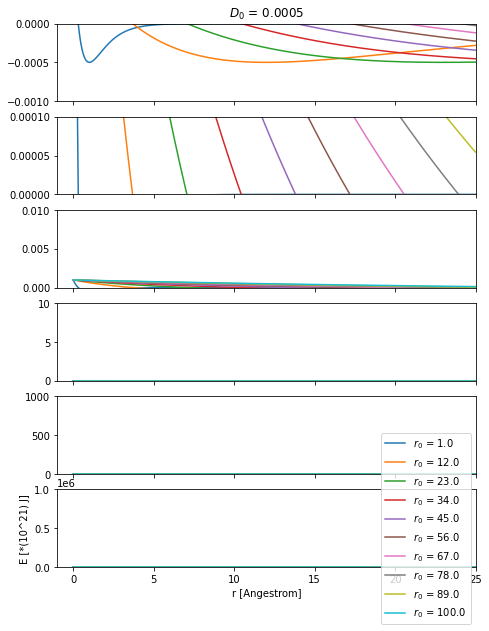

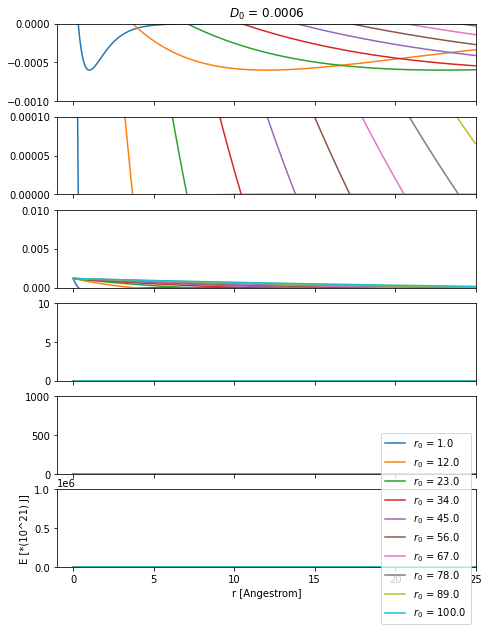

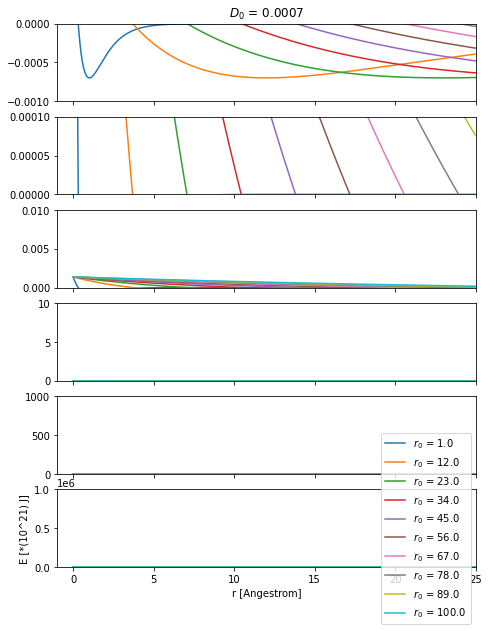

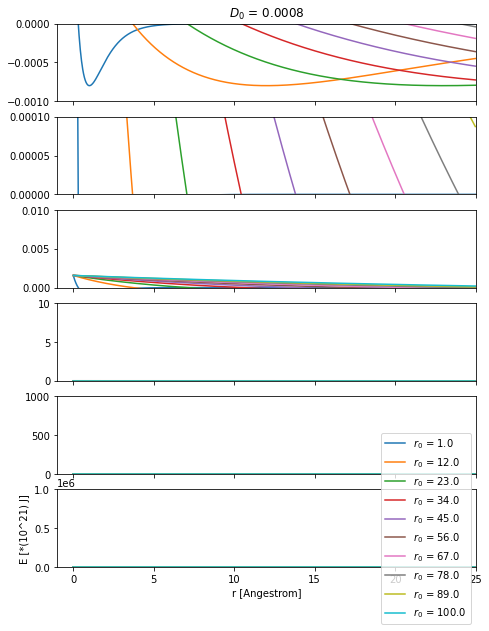

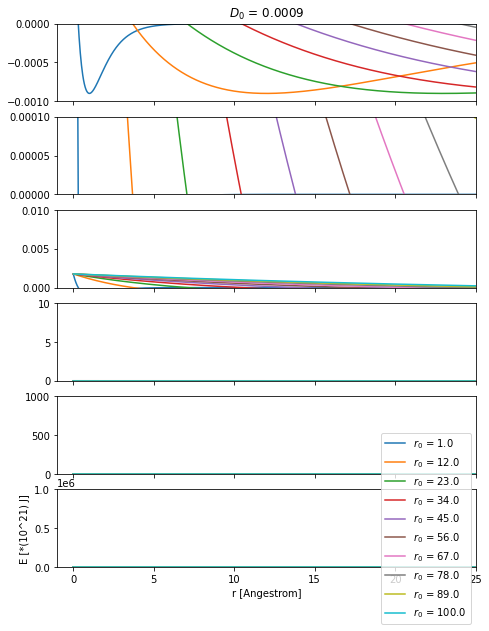

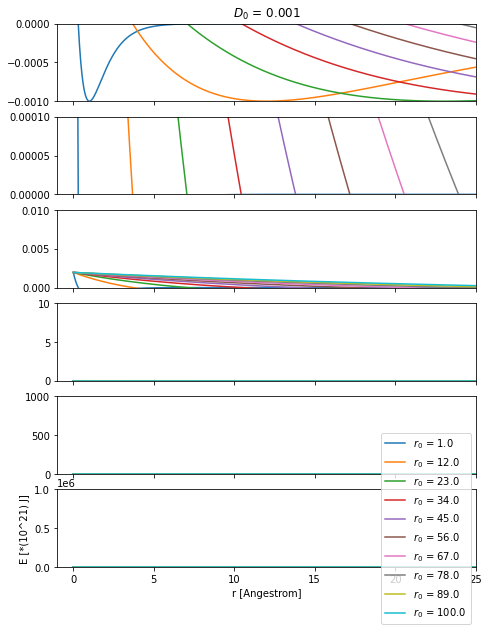

In [12]:
from IPython.core.pylabtools import figsize
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom

EPS = np.linspace(1e-4, 1e-3, 10)
SIG = np.linspace(1, 100, 10)

for eps in EPS:
  D_0 = eps
  fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, figsize=(7.5, 10))
  for sig in SIG: 
    r_0 = sig
    alpha = 1 / sig
    #r_min = ((5/2)**(1/6))*sig
    distance = np.linspace(0.01, 25, 1000, False)
    morse = np.zeros(len(distance))
    index = 0
    for r in distance:
      morse[index] = D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0)))
      index = index + 1
    #plt.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig:.2}')
    ax1.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
    ax1.set_ylim((-1e-3, 0))
    ax1.set_xlim((-1,25))
    ax2.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
    ax2.set_ylim((0, 1e-4))
    ax2.set_xlim((-1,25))
    ax3.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
    ax3.set_ylim((0, 1e-2))
    ax3.set_xlim((-1,25))
    ax4.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
    ax4.set_ylim((0, 1e1))
    ax4.set_xlim((-1,25))
    ax5.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
    ax5.set_ylim((0, 1e3))
    ax5.set_xlim((-1,25))
    ax6.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
    ax6.set_ylim((0, 1e6))
    ax6.set_xlim((-1,25))
    plt.xlabel('r [Angestrom]')
    plt.ylabel('E [*(10^21) J]')
  #plt.legend(loc='right')
  #ax1.legend(loc='right')
  #ax2.legend(loc='right')
  ax6.legend(loc='right')
  #ax4.legend(loc='right')
  ax1.set_title('$D_0$ = 'f'{eps:.3}')
  plt.show()

##Overlay of all (except PNAS)

Text(0, 0.5, 'E [*(10^21) J]')

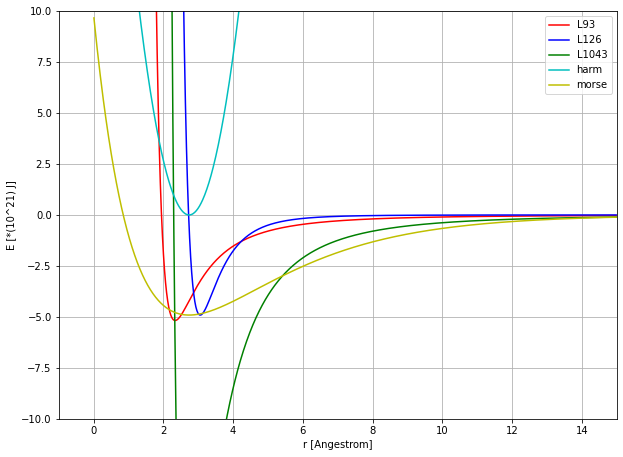

In [13]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
LJ93_r_min = ((5/2)**(1/6))*sig
LJ126_r_min_ = (2**(1/6)) * sig 
LJ1043_r_min = 2.73946825
harm_r_min = 2.73946825
harm_rc = harm_r_min
morse_r_min = 2.73946825
morse_r_0 = morse_r_min
morse_D_0  = eps #depth of the potential (energy units)
morse_alpha = 1/sig #width parameter (1/distance units)
#
distance = np.linspace(0.01, 15, 1000, False)
#
LJ93 = np.zeros(len(distance))
LJ126 = np.zeros(len(distance))
LJ1043 = np.zeros(len(distance))
harm = np.zeros(len(distance))
morse = np.zeros(len(distance))
#
index = 0
for r in distance:
  LJ93[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3))
  LJ126[index] = 4*eps*(((sig/r)**12)-((sig/r)**6))
  LJ1043[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3))))
  harm[index] = eps*((r - harm_rc)**2)
  morse[index] = morse_D_0*(math.exp(-2*morse_alpha*(r - morse_r_0)) - 2*math.exp(-morse_alpha*(r - morse_r_0)))
  index = index + 1
fig, ax = plt.subplots(figsize=(10,7.5))
ax.plot(distance, LJ93, 'r', label='L93')
ax.plot(distance, LJ126, 'b', label='L126')
ax.plot(distance, LJ1043, 'g', label='L1043')
ax.plot(distance, harm, 'c', label='harm')
ax.plot(distance, morse, 'y', label='morse')
ax.grid()
ax.set_xlim([-1, 15])
ax.set_ylim([-10, 10])
ax.legend()
ax.set_xlabel('r [Angestrom]')
ax.set_ylabel('E [*(10^21) J]')

#LJ-PNAS

For style PNAS(lj126), the energy $E$ is given by the 12/6 potential:

$E = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 12\times\left(\frac{\sigma}{r} \right)^{13} - 6\times c\times\left(\frac{\sigma}{r} \right)^7 \right]  \quad \implies \quad 12\left(\frac{\sigma}{r} \right)^{13} = 6c\times\left(\frac{\sigma}{r} \right)^7 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{6c}{12}$

$r_{min} = \left(\frac{2}{c}\right)^{\frac{1}{6}}σ$

**The $r_{min}$ depends on the value of $c$, hydrophilic/hydrophobic parameter.** 

## Single plot

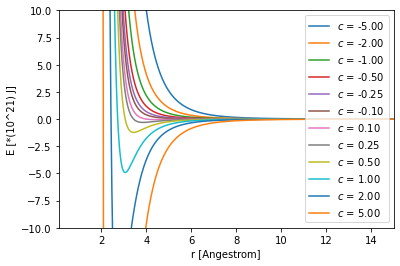

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'r minimum')

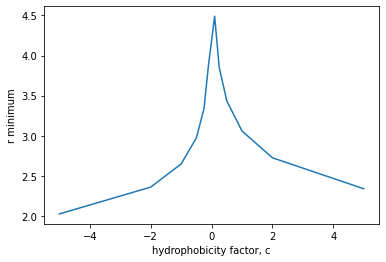

In [14]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom
C = [-5, -2, -1, -0.5, -0.25, -0.1, 0.1, 0.25, 0.5, 1, 2, 5]
Rm = []
#plt.figure(figsize=(10,7.5))
for c in C:
  r_min = ((2/c)**(1/6)) * sig 
  Rm.append(r_min)
  distance = np.linspace(0.01, 15, 1000, False)
  pnas = np.zeros(len(distance))
  index = 0
  for r in distance:
    pnas[index] = 4*eps*(((sig/r)**12)-c*((sig/r)**6))
    index = index + 1
  plt.plot(distance, pnas, label = '$c$'' = 'f'{c:.2f}')
  plt.grid()
  plt.ylim((-10, 10))
  plt.xlim((0.1,15))
  plt.legend(loc='upper right')
  plt.xlabel('r [Angestrom]')
  plt.ylabel('E [*(10^21) J]')
plt.show()
#plt.figure(figsize=(10,7.5))
plt.plot(C, Rm)
plt.xlabel('hydrophobicity factor, c')
plt.ylabel('r minimum')

## Overlay PNAS 

### with Morse

$E_{PNAS} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

$E_{Morse} = D_0 \left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right]          \quad \quad$ for $\quad \quad$ $r < r_c$

In [15]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25]
#
for c in C:
  EPS = np.linspace(1e-4, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = eps
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, sharex=True, figsize=(7.5, 10))
    for sig in SIG: 
      r_0 = sig
      alpha = 1 / sig
      distance = np.linspace(0.01, 25, 1000, False)
      morse = np.zeros(len(distance))
      pnas = np.zeros(len(distance))
      index = 0
      for r in distance:
        morse[index] = D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0)))
        pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
        index = index + 1
      ax1.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax2.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax3.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax4.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax5.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax6.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax7.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax8.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax9.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax10.plot(distance, morse, label = '$r_0$ = 'f'{sig}')
      ax1.plot(distance, pnas, '.r')
      ax2.plot(distance, pnas, '.r')
      ax3.plot(distance, pnas, '.r')
      ax4.plot(distance, pnas, '.r')
      ax5.plot(distance, pnas, '.r')
      ax6.plot(distance, pnas, '.r')
      ax7.plot(distance, pnas, '.r')
      ax8.plot(distance, pnas, '.r')
      ax9.plot(distance, pnas, '.r')
      ax10.plot(distance, pnas, '.r')
      ax1.set_ylim((-1e-9, 0))
      ax2.set_ylim((-1e-6, 0))
      ax3.set_ylim((-1e-3, 0))
      ax4.set_ylim((-1e-1, 0))
      ax5.set_ylim((-1e-1, 1e-1))
      ax6.set_ylim((0, 1e9))
      ax7.set_ylim((0, 1e6))
      ax8.set_ylim((0, 1e3))
      ax9.set_ylim((0, 1))
      ax10.set_ylim((0, 1e-1))
      ax1.set_xlim((-1,25))
      ax2.set_xlim((-1,25))
      ax3.set_xlim((-1,25))
      ax4.set_xlim((-1,25))
      ax5.set_xlim((-1,25))
      ax6.set_xlim((-1,25))
      ax7.set_xlim((-1,25))
      ax8.set_xlim((-1,25))
      ax9.set_xlim((-1,25))
      ax10.set_xlim((-1,25))
      plt.xlabel('r [Angestrom]')
      plt.ylabel('E [*(10^21) J]')
    ax10.legend(loc='right')
    ax1.set_title('$c$ = ' f'{c}' ', $D_0$ = ' f'{eps:.3}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### with LJ104

$E_{PNAS} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

$E_{LJ1043} = 2π\epsilon \left[\frac{2}{5} \left(\frac{\sigma}{r} \right)^{10} - \left(\frac{\sigma}{r} \right)^4 - \frac{\sqrt{2}σ^3}{3\left( r + \left( \frac{0.61}{\sqrt{2}}\right)\sigma\right)^3}\right]          \quad \quad$ for $\quad \quad$ $r < r_c$

In [16]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, sharex=True, figsize=(7.5, 10))
    for sig in SIG: 
      distance = np.linspace(0.01, 25, 1000, False)
      LJ1043 = np.zeros(len(distance))
      pnas = np.zeros(len(distance))
      index = 0
      for r in distance:
        LJ1043[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3))))
        pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
        index = index + 1
      ax1.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax2.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax3.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax4.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax5.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax6.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax7.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax8.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax9.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax10.plot(distance, LJ1043, label = '$\sigma$ = 'f'{sig}')
      ax1.plot(distance, pnas, '.r')
      ax2.plot(distance, pnas, '.r')
      ax3.plot(distance, pnas, '.r')
      ax4.plot(distance, pnas, '.r')
      ax5.plot(distance, pnas, '.r')
      ax6.plot(distance, pnas, '.r')
      ax7.plot(distance, pnas, '.r')
      ax8.plot(distance, pnas, '.r')
      ax9.plot(distance, pnas, '.r')
      ax10.plot(distance, pnas, '.r')
      ax1.set_ylim((-1e-9, 0))
      ax2.set_ylim((-1e-6, 0))
      ax3.set_ylim((-1e-3, 0))
      ax4.set_ylim((-1e-1, 0))
      ax5.set_ylim((-1e-1, 1e-1))
      ax6.set_ylim((0, 1e9))
      ax7.set_ylim((0, 1e6))
      ax8.set_ylim((0, 1e3))
      ax9.set_ylim((0, 1))
      ax10.set_ylim((0, 1e-1))
      ax1.set_xlim((-1,25))
      ax2.set_xlim((-1,25))
      ax3.set_xlim((-1,25))
      ax4.set_xlim((-1,25))
      ax5.set_xlim((-1,25))
      ax6.set_xlim((-1,25))
      ax7.set_xlim((-1,25))
      ax8.set_xlim((-1,25))
      ax9.set_xlim((-1,25))
      ax10.set_xlim((-1,25))
      plt.xlabel('r [Angestrom]')
      plt.ylabel('E [*(10^21) J]')
    ax10.legend(loc='right')
    ax1.set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### with LJ93

$E_{PNAS} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

$E = \epsilon \left[ \frac{2}{15} \left(\frac{\sigma}{r} \right)^9 - \left(\frac{\sigma}{r} \right)^3 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

In [17]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, sharex=True, figsize=(7.5, 10))
    for sig in SIG: 
      distance = np.linspace(0.01, 25, 1000, False)
      LJ93 = np.zeros(len(distance))
      pnas = np.zeros(len(distance))
      index = 0
      for r in distance:
        LJ93[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3))
        pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
        index = index + 1
      ax1.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax2.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax3.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax4.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax5.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax6.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax7.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax8.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax9.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax10.plot(distance, LJ93, label = '$\sigma$ = 'f'{sig}')
      ax1.plot(distance, pnas, '.r')
      ax2.plot(distance, pnas, '.r')
      ax3.plot(distance, pnas, '.r')
      ax4.plot(distance, pnas, '.r')
      ax5.plot(distance, pnas, '.r')
      ax6.plot(distance, pnas, '.r')
      ax7.plot(distance, pnas, '.r')
      ax8.plot(distance, pnas, '.r')
      ax9.plot(distance, pnas, '.r')
      ax10.plot(distance, pnas, '.r')
      ax1.set_ylim((-1e-9, 0))
      ax2.set_ylim((-1e-6, 0))
      ax3.set_ylim((-1e-3, 0))
      ax4.set_ylim((-1e-1, 0))
      ax5.set_ylim((-1e-1, 1e-1))
      ax6.set_ylim((0, 1e9))
      ax7.set_ylim((0, 1e6))
      ax8.set_ylim((0, 1e3))
      ax9.set_ylim((0, 1))
      ax10.set_ylim((0, 1e-1))
      ax1.set_xlim((-1,25))
      ax2.set_xlim((-1,25))
      ax3.set_xlim((-1,25))
      ax4.set_xlim((-1,25))
      ax5.set_xlim((-1,25))
      ax6.set_xlim((-1,25))
      ax7.set_xlim((-1,25))
      ax8.set_xlim((-1,25))
      ax9.set_xlim((-1,25))
      ax10.set_xlim((-1,25))
      plt.xlabel('r [Angestrom]')
      plt.ylabel('E [*(10^21) J]')
    ax10.legend(loc='right')
    ax1.set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### with LJ126

$E_{PNAS} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

$E = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

In [18]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, sharex=True, figsize=(7.5, 10))
    for sig in SIG: 
      distance = np.linspace(0.01, 25, 1000, False)
      LJ126 = np.zeros(len(distance))
      pnas = np.zeros(len(distance))
      index = 0
      for r in distance:
        LJ126[index] = 4*eps*(((sig/r)**12)-((sig/r)**6))
        pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
        index = index + 1
      ax1.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax2.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax3.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax4.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax5.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax6.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax7.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax8.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax9.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax10.plot(distance, LJ126, label = '$\sigma$ = 'f'{sig}')
      ax1.plot(distance, pnas, '.r')
      ax2.plot(distance, pnas, '.r')
      ax3.plot(distance, pnas, '.r')
      ax4.plot(distance, pnas, '.r')
      ax5.plot(distance, pnas, '.r')
      ax6.plot(distance, pnas, '.r')
      ax7.plot(distance, pnas, '.r')
      ax8.plot(distance, pnas, '.r')
      ax9.plot(distance, pnas, '.r')
      ax10.plot(distance, pnas, '.r')
      ax1.set_ylim((-1e-9, 0))
      ax2.set_ylim((-1e-6, 0))
      ax3.set_ylim((-1e-3, 0))
      ax4.set_ylim((-1e-1, 0))
      ax5.set_ylim((-1e-1, 1e-1))
      ax6.set_ylim((0, 1e9))
      ax7.set_ylim((0, 1e6))
      ax8.set_ylim((0, 1e3))
      ax9.set_ylim((0, 1))
      ax10.set_ylim((0, 1e-1))
      ax1.set_xlim((-1,25))
      ax2.set_xlim((-1,25))
      ax3.set_xlim((-1,25))
      ax4.set_xlim((-1,25))
      ax5.set_xlim((-1,25))
      ax6.set_xlim((-1,25))
      ax7.set_xlim((-1,25))
      ax8.set_xlim((-1,25))
      ax9.set_xlim((-1,25))
      ax10.set_xlim((-1,25))
      plt.xlabel('r [Angestrom]')
      plt.ylabel('E [*(10^21) J]')
    ax10.legend(loc='right')
    ax1.set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Combinations 

#### Negative C

##### 126 + Morse

In [19]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -15, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = -eps
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, sharex=True, figsize=(7.5, 10))
    for sig in SIG: 
      r_0 = sig
      alpha = 1/ sig
      distance = np.linspace(0.01, 25, 1000, False)
      Mix = np.zeros(len(distance))
      pnas = np.zeros(len(distance))
      index = 0
      for r in distance:
        Mix[index] = 4*eps*(((sig/r)**12)-((sig/r)**6)) + D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0))) 
        pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
        index = index + 1
      ax1.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax2.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax3.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax4.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax5.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax6.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax7.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax8.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax9.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax10.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax1.plot(distance, pnas, '.r')
      ax2.plot(distance, pnas, '.r')
      ax3.plot(distance, pnas, '.r')
      ax4.plot(distance, pnas, '.r')
      ax5.plot(distance, pnas, '.r')
      ax6.plot(distance, pnas, '.r')
      ax7.plot(distance, pnas, '.r')
      ax8.plot(distance, pnas, '.r')
      ax9.plot(distance, pnas, '.r')
      ax10.plot(distance, pnas, '.r')
      ax1.set_ylim((-1e-9, 0))
      ax2.set_ylim((-1e-6, 0))
      ax3.set_ylim((-1e-3, 0))
      ax4.set_ylim((-1e-1, 0))
      ax5.set_ylim((-1e-1, 1e-1))
      ax6.set_ylim((0, 1e9))
      ax7.set_ylim((0, 1e6))
      ax8.set_ylim((0, 1e3))
      ax9.set_ylim((0, 1))
      ax10.set_ylim((0, 1e-1))
      ax1.set_xlim((-1,25))
      ax2.set_xlim((-1,25))
      ax3.set_xlim((-1,25))
      ax4.set_xlim((-1,25))
      ax5.set_xlim((-1,25))
      ax6.set_xlim((-1,25))
      ax7.set_xlim((-1,25))
      ax8.set_xlim((-1,25))
      ax9.set_xlim((-1,25))
      ax10.set_xlim((-1,25))
      plt.xlabel('r [Angestrom]')
      plt.ylabel('E [*(10^21) J]')
    ax10.legend(loc='right')
    ax1.set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

###### Tunning 

In [36]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -15, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001]
#
Spec = [1, 100, 1000]
#
for c in C:
  EPS = np.linspace(1e-6, 1e-5, 3)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = -eps
    fig, axs = plt.subplots(10, 3, sharex=True, figsize=(15, 10))
    specs = -1
    for spec in Spec: 
      specs = specs + 1
      for sig in SIG: 
        r_0 = sig
        alpha = 1/ sig
        distance = np.linspace(0.01, 25, 1000, False)
        Mix = np.zeros(len(distance))
        pnas = np.zeros(len(distance))
        index = 0
        for r in distance:
          Mix[index] = 4*eps*(((sig/r)**12)-((sig/r)**6)) + spec*D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0))) 
          pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
          index = index + 1
        axs[0,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[1,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[2,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[3,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[4,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[5,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[6,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[7,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[8,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[9,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[0,specs].plot(distance, pnas, '.r')
        axs[1,specs].plot(distance, pnas, '.r')
        axs[2,specs].plot(distance, pnas, '.r')
        axs[3,specs].plot(distance, pnas, '.r')
        axs[4,specs].plot(distance, pnas, '.r')
        axs[5,specs].plot(distance, pnas, '.r')
        axs[6,specs].plot(distance, pnas, '.r')
        axs[7,specs].plot(distance, pnas, '.r')
        axs[8,specs].plot(distance, pnas, '.r')
        axs[9,specs].plot(distance, pnas, '.r')
        axs[0,specs].set_ylim((-1e-9, 0))
        axs[1,specs].set_ylim((-1e-6, 0))
        axs[2,specs].set_ylim((-1e-3, 0))
        axs[3,specs].set_ylim((-1e-1, 0))
        axs[4,specs].set_ylim((-1e-1, 1e-1))
        axs[5,specs].set_ylim((0, 1e9))
        axs[6,specs].set_ylim((0, 1e6))
        axs[7,specs].set_ylim((0, 1e3))
        axs[8,specs].set_ylim((0, 1))
        axs[9,specs].set_ylim((0, 1e-1))
        axs[0,specs].set_xlim((-1,25))
        axs[1,specs].set_xlim((-1,25))
        axs[2,specs].set_xlim((-1,25))
        axs[3,specs].set_xlim((-1,25))
        axs[4,specs].set_xlim((-1,25))
        axs[5,specs].set_xlim((-1,25))
        axs[6,specs].set_xlim((-1,25))
        axs[7,specs].set_xlim((-1,25))
        axs[8,specs].set_xlim((-1,25))
        axs[9,specs].set_xlim((-1,25))
        plt.xlabel('r [Angestrom]')
        plt.ylabel('E [*(10^21) J]')
      axs[9,specs].legend(loc='right')
      axs[0,specs].set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}' ', with ''$D_0 / \epsilon$'' = 'f'{-spec}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### 93 + Morse

In [21]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -15, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = -eps
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, sharex=True, figsize=(7.5, 10))
    for sig in SIG: 
      r_0 = sig
      alpha = 1/ sig
      distance = np.linspace(0.01, 25, 1000, False)
      Mix = np.zeros(len(distance))
      pnas = np.zeros(len(distance))
      index = 0
      for r in distance:
        Mix[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3)) + D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0))) 
        pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
        index = index + 1
      ax1.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax2.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax3.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax4.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax5.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax6.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax7.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax8.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax9.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax10.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax1.plot(distance, pnas, '.r')
      ax2.plot(distance, pnas, '.r')
      ax3.plot(distance, pnas, '.r')
      ax4.plot(distance, pnas, '.r')
      ax5.plot(distance, pnas, '.r')
      ax6.plot(distance, pnas, '.r')
      ax7.plot(distance, pnas, '.r')
      ax8.plot(distance, pnas, '.r')
      ax9.plot(distance, pnas, '.r')
      ax10.plot(distance, pnas, '.r')
      ax1.set_ylim((-1e-9, 0))
      ax2.set_ylim((-1e-6, 0))
      ax3.set_ylim((-1e-3, 0))
      ax4.set_ylim((-1e-1, 0))
      ax5.set_ylim((-1e-1, 1e-1))
      ax6.set_ylim((0, 1e9))
      ax7.set_ylim((0, 1e6))
      ax8.set_ylim((0, 1e3))
      ax9.set_ylim((0, 1))
      ax10.set_ylim((0, 1e-1))
      ax1.set_xlim((-1,25))
      ax2.set_xlim((-1,25))
      ax3.set_xlim((-1,25))
      ax4.set_xlim((-1,25))
      ax5.set_xlim((-1,25))
      ax6.set_xlim((-1,25))
      ax7.set_xlim((-1,25))
      ax8.set_xlim((-1,25))
      ax9.set_xlim((-1,25))
      ax10.set_xlim((-1,25))
      plt.xlabel('r [Angestrom]')
      plt.ylabel('E [*(10^21) J]')
    ax10.legend(loc='right')
    ax1.set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

###### Tunning 

In [22]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -15, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001]
#
Spec = [1, 10, 100]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = -eps
    fig, axs = plt.subplots(10, 3, sharex=True, figsize=(15, 10))
    specs = -1
    for spec in Spec: 
      specs = specs + 1
      for sig in SIG: 
        r_0 = sig
        alpha = 1/ sig
        distance = np.linspace(0.01, 25, 1000, False)
        Mix = np.zeros(len(distance))
        pnas = np.zeros(len(distance))
        index = 0
        for r in distance:
          Mix[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3)) + spec*D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0))) 
          pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
          index = index + 1
        axs[0,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[1,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[2,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[3,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[4,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[5,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[6,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[7,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[8,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[9,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[0,specs].plot(distance, pnas, '.r')
        axs[1,specs].plot(distance, pnas, '.r')
        axs[2,specs].plot(distance, pnas, '.r')
        axs[3,specs].plot(distance, pnas, '.r')
        axs[4,specs].plot(distance, pnas, '.r')
        axs[5,specs].plot(distance, pnas, '.r')
        axs[6,specs].plot(distance, pnas, '.r')
        axs[7,specs].plot(distance, pnas, '.r')
        axs[8,specs].plot(distance, pnas, '.r')
        axs[9,specs].plot(distance, pnas, '.r')
        axs[0,specs].set_ylim((-1e-9, 0))
        axs[1,specs].set_ylim((-1e-6, 0))
        axs[2,specs].set_ylim((-1e-3, 0))
        axs[3,specs].set_ylim((-1e-1, 0))
        axs[4,specs].set_ylim((-1e-1, 1e-1))
        axs[5,specs].set_ylim((0, 1e9))
        axs[6,specs].set_ylim((0, 1e6))
        axs[7,specs].set_ylim((0, 1e3))
        axs[8,specs].set_ylim((0, 1))
        axs[9,specs].set_ylim((0, 1e-1))
        axs[0,specs].set_xlim((-1,25))
        axs[1,specs].set_xlim((-1,25))
        axs[2,specs].set_xlim((-1,25))
        axs[3,specs].set_xlim((-1,25))
        axs[4,specs].set_xlim((-1,25))
        axs[5,specs].set_xlim((-1,25))
        axs[6,specs].set_xlim((-1,25))
        axs[7,specs].set_xlim((-1,25))
        axs[8,specs].set_xlim((-1,25))
        axs[9,specs].set_xlim((-1,25))
        plt.xlabel('r [Angestrom]')
        plt.ylabel('E [*(10^21) J]')
      axs[9,specs].legend(loc='right')
      axs[0,specs].set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}' ', with ''$D_0 / \epsilon$'' = 'f'{-spec}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### 1043 + Morse

In [23]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -15, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = -eps
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, sharex=True, figsize=(7.5, 10))
    for sig in SIG: 
      r_0 = sig
      alpha = 1/ sig
      distance = np.linspace(0.01, 25, 1000, False)
      Mix = np.zeros(len(distance))
      pnas = np.zeros(len(distance))
      index = 0
      for r in distance:
        Mix[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3)))) + D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0))) 
        pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
        index = index + 1
      ax1.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax2.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax3.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax4.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax5.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax6.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax7.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax8.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax9.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax10.plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
      ax1.plot(distance, pnas, '.r')
      ax2.plot(distance, pnas, '.r')
      ax3.plot(distance, pnas, '.r')
      ax4.plot(distance, pnas, '.r')
      ax5.plot(distance, pnas, '.r')
      ax6.plot(distance, pnas, '.r')
      ax7.plot(distance, pnas, '.r')
      ax8.plot(distance, pnas, '.r')
      ax9.plot(distance, pnas, '.r')
      ax10.plot(distance, pnas, '.r')
      ax1.set_ylim((-1e-9, 0))
      ax2.set_ylim((-1e-6, 0))
      ax3.set_ylim((-1e-3, 0))
      ax4.set_ylim((-1e-1, 0))
      ax5.set_ylim((-1e-1, 1e-1))
      ax6.set_ylim((0, 1e9))
      ax7.set_ylim((0, 1e6))
      ax8.set_ylim((0, 1e3))
      ax9.set_ylim((0, 1))
      ax10.set_ylim((0, 1e-1))
      ax1.set_xlim((-1,25))
      ax2.set_xlim((-1,25))
      ax3.set_xlim((-1,25))
      ax4.set_xlim((-1,25))
      ax5.set_xlim((-1,25))
      ax6.set_xlim((-1,25))
      ax7.set_xlim((-1,25))
      ax8.set_xlim((-1,25))
      ax9.set_xlim((-1,25))
      ax10.set_xlim((-1,25))
      plt.xlabel('r [Angestrom]')
      plt.ylabel('E [*(10^21) J]')
    ax10.legend(loc='right')
    ax1.set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

###### Tunning 

In [24]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -15, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001]
#
Spec = [1, 10, 100]
#
for c in C:
  EPS = np.linspace(1e-5, 1e-3, 5)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = -eps
    fig, axs = plt.subplots(10, 3, sharex=True, figsize=(15, 10))
    specs = -1
    for spec in Spec: 
      specs = specs + 1
      for sig in SIG: 
        r_0 = sig
        alpha = 1/ sig
        distance = np.linspace(0.01, 25, 1000, False)
        Mix = np.zeros(len(distance))
        pnas = np.zeros(len(distance))
        index = 0
        for r in distance:
          Mix[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3)))) + spec*D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0))) 
          pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
          index = index + 1
        axs[0,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[1,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[2,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[3,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[4,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[5,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[6,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[7,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[8,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[9,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[0,specs].plot(distance, pnas, '.r')
        axs[1,specs].plot(distance, pnas, '.r')
        axs[2,specs].plot(distance, pnas, '.r')
        axs[3,specs].plot(distance, pnas, '.r')
        axs[4,specs].plot(distance, pnas, '.r')
        axs[5,specs].plot(distance, pnas, '.r')
        axs[6,specs].plot(distance, pnas, '.r')
        axs[7,specs].plot(distance, pnas, '.r')
        axs[8,specs].plot(distance, pnas, '.r')
        axs[9,specs].plot(distance, pnas, '.r')
        axs[0,specs].set_ylim((-1e-9, 0))
        axs[1,specs].set_ylim((-1e-6, 0))
        axs[2,specs].set_ylim((-1e-3, 0))
        axs[3,specs].set_ylim((-1e-1, 0))
        axs[4,specs].set_ylim((-1e-1, 1e-1))
        axs[5,specs].set_ylim((0, 1e9))
        axs[6,specs].set_ylim((0, 1e6))
        axs[7,specs].set_ylim((0, 1e3))
        axs[8,specs].set_ylim((0, 1))
        axs[9,specs].set_ylim((0, 1e-1))
        axs[0,specs].set_xlim((-1,25))
        axs[1,specs].set_xlim((-1,25))
        axs[2,specs].set_xlim((-1,25))
        axs[3,specs].set_xlim((-1,25))
        axs[4,specs].set_xlim((-1,25))
        axs[5,specs].set_xlim((-1,25))
        axs[6,specs].set_xlim((-1,25))
        axs[7,specs].set_xlim((-1,25))
        axs[8,specs].set_xlim((-1,25))
        axs[9,specs].set_xlim((-1,25))
        plt.xlabel('r [Angestrom]')
        plt.ylabel('E [*(10^21) J]')
      axs[9,specs].legend(loc='right')
      axs[0,specs].set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}' ', with ''$D_0 / \epsilon$'' = 'f'{-spec}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Analytical 

$E_{pnas} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - c×\left(\frac{\sigma}{r} \right)^6 \right]$

$E_{LJ} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right]$

$c = c' + 1$

$E_{pnas} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - \left( c' + 1 \right)×\left(\frac{\sigma}{r} \right)^6 \right]$

$E_{pnas} = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] - 4\epsilon × c'\left(\frac{\sigma}{r} \right)^6$

$E_{pnas} = E_{LJ}  - 4\epsilon × c'\left(\frac{\sigma}{r} \right)^6$

$E_{Morse} = D_0 \left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right] = - 4\epsilon × c'\left(\frac{\sigma}{r} \right)^6$

$D_0 = - 4\epsilon × c'$

$\left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right] = k = \left(\frac{\sigma}{r} \right)^6$



---



## Final

### c<0

In [37]:
eps_pnas = 4.9115#*(10**-21) # J
sig_pnas = 2.725 # Angstrom
C = [-25, -15, -10, -5, -2.5, -1, -0.5, -0.25, -0.1, -0.01, -0.001]
#
Spec = [1, 100, 1000]
#
for c in C:
  EPS = np.linspace(1e-6, 1e-5, 3)
  SIG = np.linspace(1, 100, 10)
  for eps in EPS:
    D_0 = -eps
    fig, axs = plt.subplots(10, 3, sharex=True, figsize=(15, 10))
    specs = -1
    for spec in Spec: 
      specs = specs + 1
      for sig in SIG: 
        r_0 = sig
        alpha = 1/ sig
        distance = np.linspace(0.01, 25, 1000, False)
        Mix = np.zeros(len(distance))
        pnas = np.zeros(len(distance))
        index = 0
        for r in distance:
          Mix[index] = 4*eps*(((sig/r)**12)-((sig/r)**6)) + spec*D_0*(math.e**(-2*alpha*(r - r_0)) - 2*math.e**(-alpha*(r - r_0))) 
          pnas[index] = 4*eps_pnas*(((sig_pnas/r)**12)-c*((sig_pnas/r)**6))
          index = index + 1
        axs[0,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[1,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[2,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[3,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[4,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[5,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[6,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[7,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[8,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[9,specs].plot(distance, Mix, label = '$\sigma$ = 'f'{sig}')
        axs[0,specs].plot(distance, pnas, '.r')
        axs[1,specs].plot(distance, pnas, '.r')
        axs[2,specs].plot(distance, pnas, '.r')
        axs[3,specs].plot(distance, pnas, '.r')
        axs[4,specs].plot(distance, pnas, '.r')
        axs[5,specs].plot(distance, pnas, '.r')
        axs[6,specs].plot(distance, pnas, '.r')
        axs[7,specs].plot(distance, pnas, '.r')
        axs[8,specs].plot(distance, pnas, '.r')
        axs[9,specs].plot(distance, pnas, '.r')
        axs[0,specs].set_ylim((-1e-9, 0))
        axs[1,specs].set_ylim((-1e-6, 0))
        axs[2,specs].set_ylim((-1e-3, 0))
        axs[3,specs].set_ylim((-1e-1, 0))
        axs[4,specs].set_ylim((-1e-1, 1e-1))
        axs[5,specs].set_ylim((0, 1e9))
        axs[6,specs].set_ylim((0, 1e6))
        axs[7,specs].set_ylim((0, 1e3))
        axs[8,specs].set_ylim((0, 1))
        axs[9,specs].set_ylim((0, 1e-1))
        axs[0,specs].set_xlim((-1,25))
        axs[1,specs].set_xlim((-1,25))
        axs[2,specs].set_xlim((-1,25))
        axs[3,specs].set_xlim((-1,25))
        axs[4,specs].set_xlim((-1,25))
        axs[5,specs].set_xlim((-1,25))
        axs[6,specs].set_xlim((-1,25))
        axs[7,specs].set_xlim((-1,25))
        axs[8,specs].set_xlim((-1,25))
        axs[9,specs].set_xlim((-1,25))
        plt.xlabel('r [Angestrom]')
        plt.ylabel('E [*(10^21) J]')
      axs[9,specs].legend(loc='right')
      axs[0,specs].set_title('$c$ = ' f'{c}' ', $\epsilon$ = ' f'{eps:.3}' ', with ''$D_0 / \epsilon$'' = 'f'{-spec}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.